In [1]:
print("Driving Log Analysis - Ready")

Driving Log Analysis - Ready


In [2]:
import pandas as pd

data = {
    "time_sec": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    "speed_kmh": [0, 10, 22, 35, 50, 48, 45, 30, 15, 0],
    "accel_mps2": [0, 2.8, 3.1, 3.6, 4.2, -1.5, -2.2, -3.8, -4.5, -5.0]
}

df = pd.DataFrame(data)

df.to_csv("data/driving_log.csv", index=False)

df


,time_sec,speed_kmh,accel_mps2
0,0,0,0.0
1,1,10,2.8
2,2,22,3.1
3,3,35,3.6
4,4,50,4.2
5,5,48,-1.5
6,6,45,-2.2
7,7,30,-3.8
8,8,15,-4.5
9,9,0,-5.0


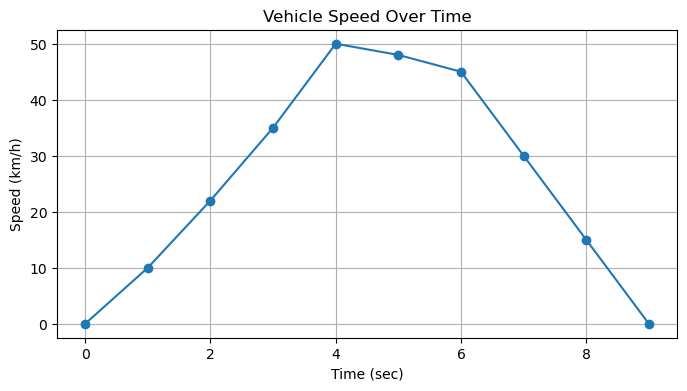

In [3]:
import matplotlib.pyplot as plt

# CSV 다시 불러오기
df = pd.read_csv("data/driving_log.csv")

# 속도 vs 시간 그래프
plt.figure(figsize=(8, 4))
plt.plot(df["time_sec"], df["speed_kmh"], marker="o")
plt.xlabel("Time (sec)")
plt.ylabel("Speed (km/h)")
plt.title("Vehicle Speed Over Time")
plt.grid(True)

plt.show()


In [4]:
# 급제동 기준 설정
hard_brake_threshold = -3.0

# 급제동 구간 필터링
hard_brake_df = df[df["accel_mps2"] < hard_brake_threshold]

hard_brake_df


,time_sec,speed_kmh,accel_mps2
7,7,30,-3.8
8,8,15,-4.5
9,9,0,-5.0


Hard Acceleration Events: 3
Hard Braking Events: 3


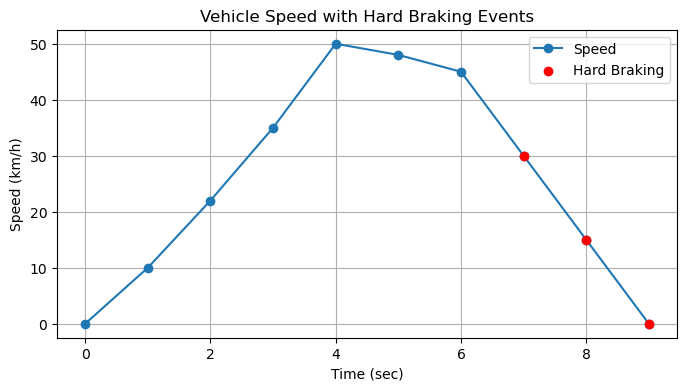

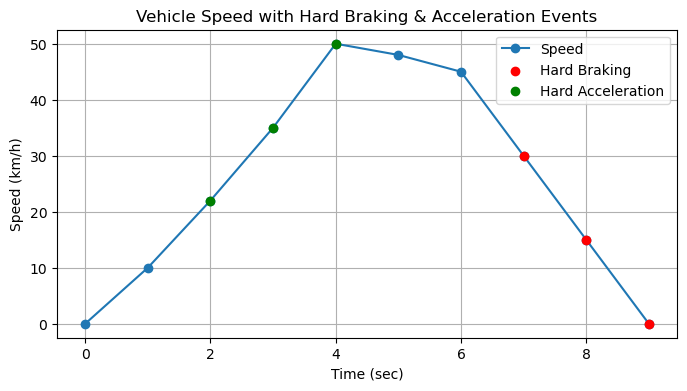

Hard Acceleration Events: 3
Hard Braking Events: 3


In [8]:
plt.figure(figsize=(8, 4))

# 전체 속도 그래프
plt.plot(df["time_sec"], df["speed_kmh"], marker="o", label="Speed")

# 급제동 구간 표시
plt.scatter(
    hard_brake_df["time_sec"],
    hard_brake_df["speed_kmh"],
    color="red",
    label="Hard Braking",
    zorder=5
)

plt.xlabel("Time (sec)")
plt.ylabel("Speed (km/h)")
plt.title("Vehicle Speed with Hard Braking Events")
plt.legend()
plt.grid(True)

# 급가속 기준 설정
hard_accel_threshold = 3.0

# 급가속 구간 필터링
hard_accel_df = df[df["accel_mps2"] > hard_accel_threshold]

hard_accel_df

print("Hard Acceleration Events:", len(hard_accel_df))
print("Hard Braking Events:", len(hard_brake_df))

# 급가속 기준
hard_accel_threshold = 3.0

# 급가속 이벤트 필터링
hard_accel_df = df[df["accel_mps2"] > hard_accel_threshold]

# 시각화
plt.figure(figsize=(8, 4))

# 기본 속도 그래프
plt.plot(df["time_sec"], df["speed_kmh"], marker="o", label="Speed")

# 급제동 표시
plt.scatter(
    hard_brake_df["time_sec"],
    hard_brake_df["speed_kmh"],
    color="red",
    label="Hard Braking",
    zorder=5
)

# 급가속 표시
plt.scatter(
    hard_accel_df["time_sec"],
    hard_accel_df["speed_kmh"],
    color="green",
    label="Hard Acceleration",
    zorder=5
)

plt.xlabel("Time (sec)")
plt.ylabel("Speed (km/h)")
plt.title("Vehicle Speed with Hard Braking & Acceleration Events")
plt.legend()
plt.grid(True)
plt.show()

print("Hard Acceleration Events:", len(hard_accel_df))
print("Hard Braking Events:", len(hard_brake_df))

plt.show()
